In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy           # Necessário para copiar os dados dentro de funções e evitar alterações inplace dos dados
                                    # Isso para que as funções recebam um dado e gerem um dado novo, mantendo o original inalterado.
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler




# TODO: converter para um arquivo requirements.txt 
# !pip install -U imbalanced-learn
# !pip install pandas
# !pip install numpy
# !pip install -U scikit-learn
# !pip install seaborn

In [2]:
DATA_PATH = 'dados_treino.csv'

raw_data = pd.read_csv(DATA_PATH)

In [3]:
raw_data.info()    # Informaçãões gerais do dataset. Permite ver se há valores NULL.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4975 entries, 0 to 4974
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   bateria                         4975 non-null   object 
 1   Tem_Instr_Violao_Viola          4975 non-null   bool   
 2   Tem_Instr_Guitarra              4975 non-null   bool   
 3   Tem_Instr_Cavaco                4975 non-null   bool   
 4   Tem_Instr_Sintetizador_Teclado  4975 non-null   bool   
 5   Tem_Instr_Piano                 4975 non-null   bool   
 6   Tem_Instr_Metais                4975 non-null   bool   
 7   Tem_Instr_Madeiras              4975 non-null   bool   
 8   Tem_Instr_Cordas                4975 non-null   bool   
 9   BPM                             4975 non-null   float64
 10  VolMedio                        4975 non-null   float64
 11  PctCantada                      4975 non-null   float64
 12  PctRap                          49

In [4]:
raw_data.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4975 entries, 0 to 4974
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   bateria                         4975 non-null   object 
 1   Tem_Instr_Violao_Viola          4975 non-null   bool   
 2   Tem_Instr_Guitarra              4975 non-null   bool   
 3   Tem_Instr_Cavaco                4975 non-null   bool   
 4   Tem_Instr_Sintetizador_Teclado  4975 non-null   bool   
 5   Tem_Instr_Piano                 4975 non-null   bool   
 6   Tem_Instr_Metais                4975 non-null   bool   
 7   Tem_Instr_Madeiras              4975 non-null   bool   
 8   Tem_Instr_Cordas                4975 non-null   bool   
 9   BPM                             4975 non-null   float64
 10  VolMedio                        4975 non-null   float64
 11  PctCantada                      4975 non-null   float64
 12  PctRap                          49

In [5]:
raw_data.head()

,bateria,Tem_Instr_Violao_Viola,Tem_Instr_Guitarra,Tem_Instr_Cavaco,Tem_Instr_Sintetizador_Teclado,Tem_Instr_Piano,Tem_Instr_Metais,Tem_Instr_Madeiras,Tem_Instr_Cordas,BPM,VolMedio,PctCantada,PctRap,duracao,ano_lancamento,modo,gostou,data_curtida,n_reproducao,id_cliente
0,Acústica,False,True,False,False,True,False,False,False,128.652946,-8.743969,38.671394,0.0,680510,1977,NaN,False,2021-07-29,5,#ID4940
1,Acústica,True,False,True,False,False,False,False,False,107.679121,-12.128194,75.739791,0.0,195746,2014,f,False,2021-07-29,5,#ID4940
2,Nenhuma,False,True,False,False,True,True,False,False,117.885751,-10.880246,35.978128,0.0,413618,1968,D#,False,2021-07-29,4,#ID4940
3,Acústica,False,True,False,False,True,True,True,False,119.309408,-12.489925,45.763376,0.0,749101,1963,D#,True,2021-07-29,3,#ID4940
4,Eletrônica,False,False,False,True,True,False,False,False,153.488568,-6.412484,58.979747,0.0,168978,2020,c,False,2021-07-29,2,#ID4940


In [6]:
# Dataset de referencia:
import sklearn.datasets
from sklearn import preprocessing
X,y = sklearn.datasets.load_boston(return_X_y=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [7]:
print(type(X))

<class 'numpy.ndarray'>


## OBS: Essa classe está em construção e deve ser adequada antes de seu uso! No momento está feita praticamente como um aglomerado de funções

In [8]:
class Preprocessor():
    '''
        Saída final esperada: um dicionário com as saídas 
    '''
        # colocar as variáveis de interesse da classe:
        # especialmente o dataframe base, e dados de trabalho
    def __init__(self):
        # colocar as variáveis de interesse da classe:
        # especialmente o dataframe de entrada
        pass

    def _bool_to_int(self, dataframe: pd.DataFrame) -> pd.DataFrame:
        '''
        
        Converte as colunas do tipo bool para o tipo int (0 e 1).
        
        '''
        columns = ['Tem_Instr_Violao_Viola', 'Tem_Instr_Guitarra', 'Tem_Instr_Cavaco', 
                'Tem_Instr_Sintetizador_Teclado', 'Tem_Instr_Piano', 'Tem_Instr_Metais', 
                'Tem_Instr_Madeiras', 'Tem_Instr_Cordas', 'gostou']                      # Adicionar as colunas da bateria aqui depois
        new_df = deepcopy(dataframe)
        
        for col in columns:
            new_df[col] = new_df[col].astype(int)
            
        return new_df
    
    def _bateria_to_bool(self, dataframe: pd.DataFrame) -> pd.DataFrame:
        '''
        
        Transforma a coluna bateria para ser representada por binários
        Essa função pode ser modificada para processar a coluna bateria de formas distintas.
        
        '''
        new_df = deepcopy(dataframe)
        new_df['bateria_eletronica'] = (new_df['bateria'] == 'Eletrônica').astype(int)
        new_df['bateria_acustica']   = (new_df['bateria'] == 'Acústica').astype(int)
        new_df['bateria_nenhuma']     = (new_df['bateria'] == 'Nenhuma').astype(int)
        new_df = new_df.drop(columns = ['bateria'])
        return new_df

    def _get_user_data(self, USER: str, raw_data: pd.DataFrame) -> pd.DataFrame:
        user_data = raw_data[raw_data['id_cliente'] == USER]
        user_data = bool_to_int(user_data)
        user_data = bateria_to_bool(user_data)
        user_data['modo'] = user_data['modo'].fillna("K")
        
        return user_data
    
    def scale_to_bool(self,scale):
        string = {
            'K'  : 1,
            'c'  : 0,
            'c#' : 0, 
            'C'  : 1,
            'C#' : 1,
            'd'  : 0,
            'd#' : 0,
            'D'  : 1,
            'D#' : 1,
            'e'  : 0,
            'E'  : 1,
            'f'  : 0,
            'f#' : 0,
            'F'  : 1,
            'F#' : 1,
            'g'  : 0,
            'g#' : 0,
            'G'  : 1,
            'G#' : 1,
            'a'  : 0,
            'a#' : 0,
            'A'  : 1,
            'A#' : 1,
            'b'  : 0,
            'B'  : 1
        }[scale]
        return string


    def scale_to_one_hot(self, raw_data: pd.DataFrame):
    # One hot encoding the mode feature data
        new_df = deepcopy(raw_data)
        mode_df = pd.get_dummies(new_df["modo"])
        new_df = new_df.drop(columns = ['modo'])
        # new_df.merge(mode_df,how='left', on='duracao')
        #  Place the DataFrames side by side
        new_df = pd.concat([new_df,mode_df], axis=1)
        return new_df

def preprocess(self):    
    '''
        Aplica todas as estratégias de preprocessamento para adequar à estrutura entendida pelo sklearn
    '''
    
    raw_data = pd.read_csv(DATA_PATH)
    raw_data['PctCantada'] = raw_data['PctCantada'] / 100
    raw_data['PctRap'] = raw_data['PctRap'] / 100
    raw_data['duracao'] = raw_data['duracao'] / (60*1000)
    raw_data['VolMedio'] = raw_data['VolMedio'].abs()
    raw_data['duracao']  = raw_data['duracao'].abs()
    raw_data['modo'] = raw_data['modo'].fillna('K')
    raw_data['escala_maior'] = raw_data['modo'].apply((lambda mode: scale_to_bool(mode)))
    # raw_data['modo'] = raw_data['modo'].apply((lambda mode: scale_to_bool(mode)))
    raw_data = bool_to_int(raw_data)
    raw_data = bateria_to_bool(raw_data)

    raw_data = scale_to_one_hot(raw_data) # Não gostei muito da solução, mas até faz sentido
    print(raw_data)

    def filter_user(self, user):
        user_data = raw_data[raw_data['id_cliente'] == USER]
        # definir melhor a interface

    def train_test_split(self): #adicionar parametros de entrada
        input_data = user_data.drop(columns = ["data_curtida", "id_cliente"])[user_data['id_cliente'] == USER]
        # X = (.to_numpy()
        X = input_data.drop(columns = ["gostou"]).to_numpy()
        Y = input_data["gostou"].to_numpy()
        Y = Y.ravel()
        print(Y.shape)
        print(X.shape)
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=109) # 70% training and 30% testv
        return X_train, X_test, y_train, y_test 
    
    def SMOTE_oversampling(self):
    # colocar uns parametros uteis de entrada
        # Teste do SMOTE
        # sm = SMOTE(random_state=42)
        # X_train_res, Y_train_res = sm.fit_resample(X_train, y_train)

        a = np.arange(0,8)
        b = np.array([11])
        c = np.arange(15,44)
        categorical_index = np.concatenate([a,c])
        categorical_index = np.concatenate([categorical_index,b])
        categorical_index = list(categorical_index)

        # Teste SMOTE-NC
        smote_nc_over = SMOTENC(categorical_features=categorical_index, random_state=0)

        under = RandomUnderSampler(sampling_strategy='majority',random_state=0)

        steps = [('o', smote_nc_over), ('u', under)]
        pipeline = Pipeline(steps=steps)

        X_train_res, Y_train_res = pipeline.fit_resample(X_train, y_train)

        # X_train_res, Y_train_res = smote_nc_over.fit_resample(X_train, y_train)

    def check_balancing(self):
        ## Count elements
        count_plus = 0
        count_minus = 0

        for y_val in Y_train_res:
            
            if y_val == 1:
                count_plus +=1
            else: 
                count_minus +=1
        print("Positive examples:",count_plus)
        print("Negative examples:",count_minus)

# Talvez criar um método que aplique todos os passos pra evitar linhas de código -> Mas acho que será só isso o dataset, não deve haver problemas extras

In [9]:
# enc = preprocessing.OneHotEncoder()
# X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
# enc.fit(X)

# transform = enc.transform([['female', 'from US', 'uses Safari'],
#                ['male', 'from Europe', 'uses Safari']]).toarray()
# print(X)
# print(transform)

In [10]:
columns = ['Tem_Instr_Violao_Viola', 'Tem_Instr_Guitarra', 'Tem_Instr_Cavaco', 
           'Tem_Instr_Sintetizador_Teclado', 'Tem_Instr_Piano', 'Tem_Instr_Metais', 
           'Tem_Instr_Madeiras', 'Tem_Instr_Cordas', 'c' ,'K' ,'c#','C' ,'C#','d' ,'d#','D' ,'D#','e' ,'E' ,'f' ,'f#','F' ,'F#','g' ,'g#','G' ,'G#','a' ,'a#','A' ,'A#','B' ,'b'] 

In [11]:
# métodos já implementados
def bool_to_int(dataframe: pd.DataFrame) -> pd.DataFrame:
    '''
    
    Converte as colunas do tipo bool para o tipo int (0 e 1).
    
    '''
    columns = ['Tem_Instr_Violao_Viola', 'Tem_Instr_Guitarra', 'Tem_Instr_Cavaco', 
               'Tem_Instr_Sintetizador_Teclado', 'Tem_Instr_Piano', 'Tem_Instr_Metais', 
               'Tem_Instr_Madeiras', 'Tem_Instr_Cordas', 'gostou']                      # Adicionar as colunas da bateria aqui depois
    new_df = deepcopy(dataframe)
    
    for col in columns:
        new_df[col] = new_df[col].astype(int)
        
    return new_df

def bateria_to_bool(dataframe: pd.DataFrame) -> pd.DataFrame:
    '''
    
    Transforma a coluna bateria para ser representada por binários
    Essa função pode ser modificada para processar a coluna bateria de formas distintas.
    
    '''
    new_df = deepcopy(dataframe)
    new_df['bateria_eletronica'] = (new_df['bateria'] == 'Eletrônica').astype(int)
    new_df['bateria_acustica']   = (new_df['bateria'] == 'Acústica').astype(int)
    new_df['bateria_nenhuma']     = (new_df['bateria'] == 'Nenhuma').astype(int)
    new_df = new_df.drop(columns = ['bateria'])
    return new_df

def get_user_data(USER: str, raw_data: pd.DataFrame) -> pd.DataFrame:
    user_data = raw_data[raw_data['id_cliente'] == USER]
    user_data = bool_to_int(user_data)
    user_data = bateria_to_bool(user_data)
    user_data['modo'] = user_data['modo'].fillna("K")
    
    return user_data

# métodos da analise exploratoria

In [12]:
def scale_to_bool(scale):
    string = {
        'K'  : 1,
        'c'  : 0,
        'c#' : 0, 
        'C'  : 1,
        'C#' : 1,
        'd'  : 0,
        'd#' : 0,
        'D'  : 1,
        'D#' : 1,
        'e'  : 0,
        'E'  : 1,
        'f'  : 0,
        'f#' : 0,
        'F'  : 1,
        'F#' : 1,
        'g'  : 0,
        'g#' : 0,
        'G'  : 1,
        'G#' : 1,
        'a'  : 0,
        'a#' : 0,
        'A'  : 1,
        'A#' : 1,
        'b'  : 0,
        'B'  : 1
    }[scale]
    return string

In [13]:
# One hot encoding the mode feature data:

def scale_to_one_hot(raw_data: pd.DataFrame):
    new_df = deepcopy(raw_data)
    mode_df = pd.get_dummies(new_df["modo"])
    new_df = new_df.drop(columns = ['modo'])
    # new_df.merge(mode_df,how='left', on='duracao')
    #  Place the DataFrames side by side
    new_df = pd.concat([new_df,mode_df], axis=1)
    return new_df

In [14]:
raw_data = pd.read_csv(DATA_PATH)
raw_data['PctCantada'] = raw_data['PctCantada'] / 100
raw_data['PctRap'] = raw_data['PctRap'] / 100
raw_data['duracao'] = raw_data['duracao'] / (60*1000)
raw_data['VolMedio'] = raw_data['VolMedio'].abs()
raw_data['duracao']  = raw_data['duracao'].abs()
raw_data['modo'] = raw_data['modo'].fillna('K')
raw_data['escala_maior'] = raw_data['modo'].apply((lambda mode: scale_to_bool(mode)))
# raw_data['modo'] = raw_data['modo'].apply((lambda mode: scale_to_bool(mode)))
raw_data = bool_to_int(raw_data)
raw_data = bateria_to_bool(raw_data)

raw_data = scale_to_one_hot(raw_data) # Não gostei muito da solução, mas até faz sentido
print(raw_data)

      Tem_Instr_Violao_Viola  Tem_Instr_Guitarra  Tem_Instr_Cavaco  ...  f#  g  g#
0                          0                   1                 0  ...   0  0   0
1                          1                   0                 1  ...   0  0   0
2                          0                   1                 0  ...   0  0   0
3                          0                   1                 0  ...   0  0   0
4                          0                   0                 0  ...   0  0   0
...                      ...                 ...               ...  ...  .. ..  ..
4970                       1                   0                 0  ...   0  0   0
4971                       1                   0                 1  ...   0  0   0
4972                       0                   0                 0  ...   0  0   0
4973                       1                   1                 0  ...   0  0   0
4974                       0                   0                 0  ...   0  0   0

[49

In [15]:
USER = '#ID9181'
# USER = '#ID4940'

user_data = raw_data[raw_data['id_cliente'] == USER]

In [16]:
input_data = user_data.drop(columns = ["data_curtida", "id_cliente"])[user_data['id_cliente'] == USER]
# X = (.to_numpy()
X = input_data.drop(columns = ["gostou"]).to_numpy()
Y = input_data["gostou"].to_numpy()
Y = Y.ravel()
print(Y.shape)
print(X.shape)

(2403,)
(2403, 44)


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=109) # 70% training and 30% testv

In [19]:
# Teste do SMOTE
# sm = SMOTE(random_state=42)
# X_train_res, Y_train_res = sm.fit_resample(X_train, y_train)

from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

a = np.arange(0,8)
b = np.array([11])
c = np.arange(15,44)
categorical_index = np.concatenate([a,c])
categorical_index = np.concatenate([categorical_index,b])
categorical_index = list(categorical_index)

# Teste SMOTE-NC
smote_nc_over = SMOTENC(categorical_features=categorical_index, random_state=0)

under = RandomUnderSampler(sampling_strategy='majority',random_state=0)

steps = [('o', smote_nc_over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_train_res, Y_train_res = pipeline.fit_resample(X_train, y_train)

# X_train_res, Y_train_res = smote_nc_over.fit_resample(X_train, y_train)

# Checar se o dataset ficou balanceado
count_plus = 0
count_minus = 0

for y_val in Y_train_res:
    
    if y_val == 1:
         count_plus +=1
    else: 
         count_minus +=1
print("Positive examples:",count_plus)
print("Negative examples:",count_minus)



Positive examples: 1635
Negative examples: 1635


## Testando um classificador para ver se a estrutura do dataset ficou correta

In [53]:
clf = DecisionTreeClassifier()
# clf.fit(X_train, y_train) # Sem SMOTE
clf.fit(X_train_res, Y_train_res)  # Com SMOTE

DecisionTreeClassifier()

In [54]:
y_pred = clf.predict(X_test)

In [55]:
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7713097713097713
Precision: 0.3090909090909091
Recall: 0.5


In [56]:
metrics.f1_score(y_test, y_pred)

0.38202247191011235

## TODO: plotar curva ROC e acurácia para comparar os resultados 

In [57]:
raw_data[raw_data['id_cliente'] == '#ID4940']['gostou'].value_counts()        # Verificar se o dataset está desbalanceado.

0    1712
1     860
Name: gostou, dtype: int64

In [58]:
def plot_auc(y_test, y_pred):
    
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
    plt.plot(fpr, tpr, color='red', lw=2)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')    
    plt.show()
    
    return

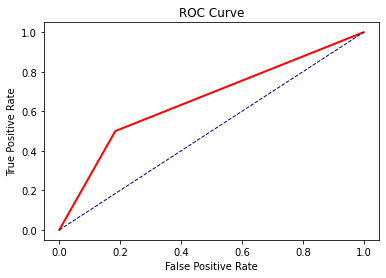

In [59]:
plot_auc(y_test, y_pred)